In [2]:
import os
import random
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("ggplot")

import faiss

In [3]:
class CFG:
    name = "eda001"
    seed = 42

    path_input = Path("../input")
    path_output = Path("../output")

In [4]:
def set_seed(seed=42):
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    # torch.manual_seed(seed)
    # torch.cuda.manual_seed(seed)
    # torch.backends.cudnn.deterministic = True


def setup(CFG):
    # expフォルダを作成
    CFG.path_exp = CFG.path_output / CFG.name
    CFG.path_exp.mkdir(parents=True, exist_ok=True)

    # seedの設定
    set_seed(CFG.seed)

    return CFG

In [5]:
CFG = setup(CFG)

In [6]:
# データの読み込み
train_log_df = pd.read_csv(CFG.path_input / "train_log.csv")
train_label_df = pd.read_csv(CFG.path_input / "train_label.csv")

test_log_df = pd.read_csv(CFG.path_input / "test_log.csv")
test_session_df = pd.read_csv(CFG.path_input / "test_session.csv")

yado_df = pd.read_csv(CFG.path_input / "yado.csv")
yado_embedding = pd.read_parquet(CFG.path_input / "image_embeddings.parquet")

In [7]:
# データの確認
print("データ数：", train_log_df.shape)
train_log_df.head()

データ数： (419270, 3)


,session_id,seq_no,yad_no
0,000007603d533d30453cc45d0f3d119f,0,2395
1,0000ca043ed437a1472c9d1d154eb49b,0,13535
2,0000d4835cf113316fe447e2f80ba1c8,0,123
3,0000fcda1ae1b2f431e55a7075d1f500,0,8475
4,000104bdffaaad1a1e0a9ebacf585f33,0,96


<Axes: xlabel='seq_no', ylabel='Count'>

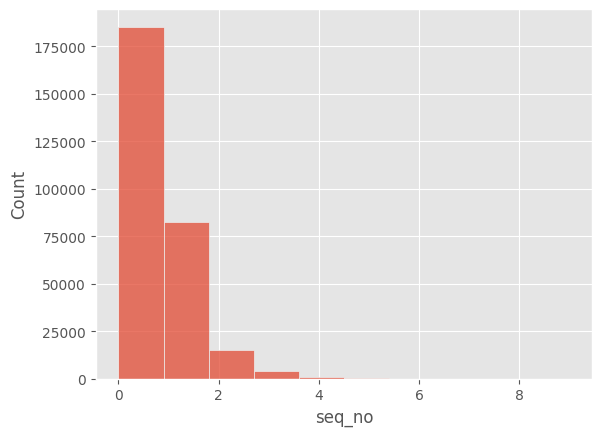

In [8]:
# session_idごとseq_noの最大値
num_session_df = train_log_df.groupby("session_id")["seq_no"].max().reset_index()

# session_idごとのseq_noの最大値の分布
sns.histplot(num_session_df["seq_no"], bins=10)

<Axes: xlabel='seq_no', ylabel='Count'>

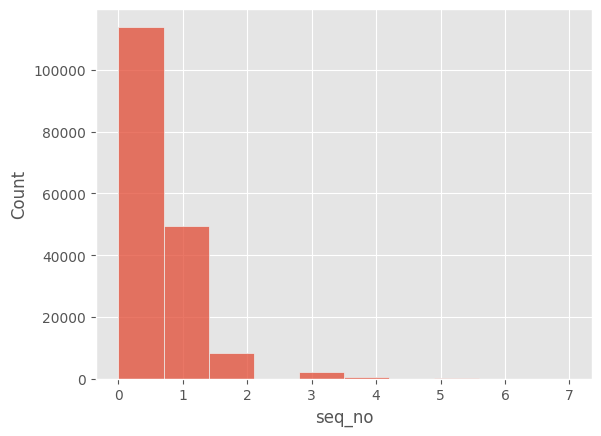

In [9]:
# session_idごとseq_noの最大値
num_session_df = test_log_df.groupby("session_id")["seq_no"].max().reset_index()

# session_idごとのseq_noの最大値の分布
sns.histplot(num_session_df["seq_no"], bins=10)

In [8]:
# データの確認
print("データ数：", train_label_df.shape)
train_log_df.head()

データ数： (288698, 2)


,session_id,seq_no,yad_no
0,000007603d533d30453cc45d0f3d119f,0,2395
1,0000ca043ed437a1472c9d1d154eb49b,0,13535
2,0000d4835cf113316fe447e2f80ba1c8,0,123
3,0000fcda1ae1b2f431e55a7075d1f500,0,8475
4,000104bdffaaad1a1e0a9ebacf585f33,0,96


In [10]:
# faissで類似度を計算するための準備
index = faiss.IndexFlatL2(512)
index.add(np.array(yado_embedding.iloc[:, 2:]))
print(index.ntotal)

178406


In [11]:
yado_df

,yad_no,yad_type,total_room_cnt,wireless_lan_flg,onsen_flg,kd_stn_5min,kd_bch_5min,kd_slp_5min,kd_conv_walk_5min,wid_cd,ken_cd,lrg_cd,sml_cd
0,1,0,129.0,1.0,0,1.0,NaN,NaN,1.0,f0112abf369fb03cdc5f5309300913da,072c85e1653e10c9c7dd065ad007125a,449c52ef581d5f9ef311189469a0520e,677a32689cd1ad74e867f1fbe43a3e1c
1,2,0,23.0,1.0,0,NaN,NaN,NaN,NaN,d86102dd9c232bade9a97dccad40df48,b4d2fb4e51ea7bca80eb1270aa474a54,5c9a8f48e9df0234da012747a02d4b29,4ee16ee838dd2703cc9a1d5a535f0ced
2,3,0,167.0,1.0,1,1.0,NaN,NaN,1.0,46e33861f921c3e38b81998fbf283f01,572d60f0f5212aacda515ebf81fb0a3a,8a623b960557e87bd1f4edf71b6255be,ab9480fd72a44d51690ab16c4ad4d49c
3,4,0,144.0,1.0,0,1.0,NaN,NaN,1.0,46e33861f921c3e38b81998fbf283f01,107c7305a74c8dcc4f143de208bf7ec2,52c9ea83f2cfe92be54cb6bc961edf21,1cc3e1838bb0fd0fde0396130b1f82b9
4,5,0,41.0,1.0,1,NaN,NaN,NaN,NaN,43875109d1dab93592812c50d18270a7,75617bb07a2785a948ab1958909211f1,9ea5a911019b66ccd42f556c42a2fe2f,be1b876af18afc4deeb3081591d2a910
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13801,13802,0,10.0,1.0,1,NaN,NaN,NaN,NaN,c312e07b7a5d456d53a5b00910a336e1,558ac1909f0318b82c621ab250329d6d,80fb3c5ad0c89931d0923e9f80885218,5eb30820716082c720836733d73c605e
13802,13803,0,NaN,NaN,0,1.0,NaN,NaN,1.0,dc414a17890cfc17d011d5038b88ca93,d78f53d0856617bc782f02c3280dfef2,e5cfcc0a43c82072aca11628ff0add53,20ad8785a30f125bee5a8a325782ab06
13803,13804,0,80.0,1.0,1,NaN,1.0,NaN,1.0,d86102dd9c232bade9a97dccad40df48,7d76599bd27ff9e7823b2b1323ca763e,c5fe8848b6ab39b040cdb3668aea9433,b3eab50ccf6ffb51c37d36ee384abfbf
13804,13805,0,8.0,1.0,1,NaN,NaN,NaN,1.0,3300cf6f774b7c6a5807110f244cbc21,689cf8289e7ea0b2eef1b017dcdfe8de,8b712435430a6875839a6c3b5a40b008,2b4165444a777465576b25f65697d739


<Axes: xlabel='yad_no', ylabel='Count'>

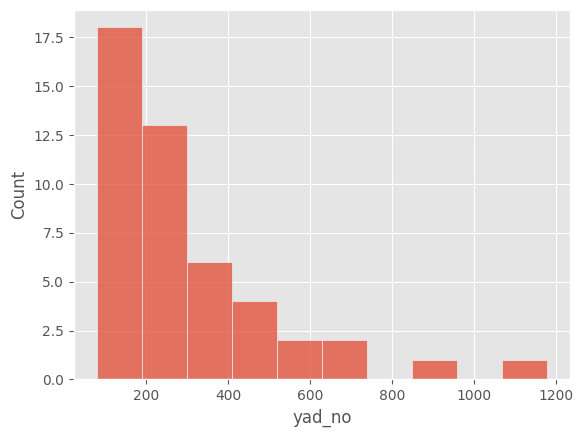

In [19]:
# "wid_cd", "ken_cd", "lrg_cd"でグループ化して件数をカウント
lrg_df = yado_df.groupby(["wid_cd", "ken_cd"])["yad_no"].count().reset_index()
sns.histplot(lrg_df["yad_no"], bins=10)

In [ ]:
# 各ユーザーの